In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(1500/necoc)
generations

15

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

41


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1297
number of class2:320

 ****** Running generation 0 ****** 

Population's average fitness: 0.44975 stdev: 0.21226
Best fitness: 0.85900 - size: (2, 13) - species 3 - id 175
Average adjusted fitness: 0.251
Mean genetic distance 2.919, standard deviation 0.429
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 21.407 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57792 stdev: 0.21391
Best fitness: 0.85900 - size: (2, 13) - species 4 - id 175
Average adjusted fitness: 0.316
Mean genetic distance 3.032, standard deviation 0.434
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 20.787 sec (21.097 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63013 stdev: 0.20048
Best fitness: 0.85900 - size: (2, 13) - species 4 - id 175
Average adjusted fitness: 0.389
Mean genetic distance 3.042, standard deviation 0.451
Population of 209 members in 38 species
Total extin

Population's average fitness: 0.64308 stdev: 0.11572
Best fitness: 0.78541 - size: (4, 17) - species 34 - id 676
Average adjusted fitness: 0.333
Mean genetic distance 3.137, standard deviation 0.478
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 30.595 sec (26.411 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64464 stdev: 0.11818
Best fitness: 0.78541 - size: (4, 17) - species 34 - id 676
Average adjusted fitness: 0.334
Mean genetic distance 3.143, standard deviation 0.472
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 28.457 sec (27.197 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65464 stdev: 0.11135
Best fitness: 0.78541 - size: (4, 17) - species 34 - id 676
Average adjusted fitness: 0.346
Mean genetic distance 3.150, standard deviation 0.472
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 27.719 sec (27.728 average)

 ***

Population's average fitness: 0.56789 stdev: 0.09163
Best fitness: 0.73840 - size: (5, 18) - species 8 - id 677
Average adjusted fitness: 0.249
Mean genetic distance 3.102, standard deviation 0.514
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 30.699 sec (23.837 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57013 stdev: 0.08922
Best fitness: 0.73840 - size: (5, 18) - species 8 - id 677
Average adjusted fitness: 0.271
Mean genetic distance 3.132, standard deviation 0.501
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 37.205 sec (26.511 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58715 stdev: 0.08851
Best fitness: 0.74768 - size: (5, 18) - species 8 - id 952
Average adjusted fitness: 0.295
Mean genetic distance 3.145, standard deviation 0.494
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 24.307 sec (26.144 average)

 ****** R

Population's average fitness: 0.65730 stdev: 0.12295
Best fitness: 0.81447 - size: (4, 18) - species 14 - id 1288
Average adjusted fitness: 0.357
Mean genetic distance 3.077, standard deviation 0.517
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 20.816 sec (21.103 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67657 stdev: 0.10109
Best fitness: 0.81447 - size: (4, 18) - species 14 - id 1288
Average adjusted fitness: 0.382
Mean genetic distance 3.064, standard deviation 0.510
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 21.587 sec (21.194 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66860 stdev: 0.11838
Best fitness: 0.81447 - size: (4, 18) - species 14 - id 1288
Average adjusted fitness: 0.375
Mean genetic distance 3.085, standard deviation 0.516
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 22.017 sec (21.327 average)
nu

Population's average fitness: 0.58543 stdev: 0.07908
Best fitness: 0.71119 - size: (4, 17) - species 30 - id 782
Average adjusted fitness: 0.228
Mean genetic distance 3.089, standard deviation 0.474
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 20.849 sec (19.741 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58115 stdev: 0.08875
Best fitness: 0.71119 - size: (4, 17) - species 30 - id 782
Average adjusted fitness: 0.242
Mean genetic distance 3.080, standard deviation 0.492
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 21.524 sec (19.964 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59023 stdev: 0.08121
Best fitness: 0.71119 - size: (4, 17) - species 30 - id 782
Average adjusted fitness: 0.238
Mean genetic distance 3.080, standard deviation 0.480
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 21.349 sec (20.118 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.53475 stdev: 0.16048
Best fitness: 0.77365 - size: (2, 13) - species 7 - id 176
Average adjusted fitness: 0.347
Mean genetic distance 2.881, standard deviation 0.480
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 17.194 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62373 stdev: 0.12795
Best fitness: 0.80952 - size: (3, 14) - species 21 - id 362
Average adjusted fitness: 0.397
Mean genetic distance 2.995, standard deviation 0.510
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 18.471 sec (17.832 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64575 stdev: 0.12806
Best fitness: 0.82313 - size: (3, 14) - species 21 - id 539
Average adjusted fitness: 0.407
Mean genetic distance 2.992, standard deviation 0.495
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 19.562 sec (18

Population's average fitness: 0.57802 stdev: 0.06603
Best fitness: 0.75201 - size: (5, 22) - species 21 - id 1441
Average adjusted fitness: 0.127
Mean genetic distance 3.212, standard deviation 0.453
Population of 195 members in 44 species
Total extinctions: 0
Generation time: 21.358 sec (20.200 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57905 stdev: 0.07001
Best fitness: 0.75201 - size: (5, 22) - species 21 - id 1441
Average adjusted fitness: 0.213
Mean genetic distance 3.218, standard deviation 0.452
Population of 197 members in 44 species
Total extinctions: 0
Generation time: 21.784 sec (20.608 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57979 stdev: 0.06863
Best fitness: 0.75201 - size: (5, 22) - species 21 - id 1441
Average adjusted fitness: 0.173
Mean genetic distance 3.238, standard deviation 0.438
Population of 199 members in 45 species
Total extinctions: 0
Generation time: 22.589 sec (21.047 average)

 

Population's average fitness: 0.73383 stdev: 0.13502
Best fitness: 0.86271 - size: (2, 13) - species 22 - id 78
Average adjusted fitness: 0.520
Mean genetic distance 2.948, standard deviation 0.481
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 20.122 sec (18.687 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.72435 stdev: 0.15315
Best fitness: 0.87260 - size: (4, 17) - species 22 - id 781
Average adjusted fitness: 0.530
Mean genetic distance 2.976, standard deviation 0.494
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 20.179 sec (18.985 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.74582 stdev: 0.13009
Best fitness: 0.88002 - size: (5, 19) - species 20 - id 1006
Average adjusted fitness: 0.531
Mean genetic distance 3.020, standard deviation 0.486
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 20.872 sec (19.300 average)

 *****

Population's average fitness: 0.59691 stdev: 0.09155
Best fitness: 0.77489 - size: (6, 20) - species 28 - id 1224
Average adjusted fitness: 0.229
Mean genetic distance 3.139, standard deviation 0.498
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 22.637 sec (21.823 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60212 stdev: 0.09237
Best fitness: 0.77489 - size: (6, 20) - species 28 - id 1224
Average adjusted fitness: 0.211
Mean genetic distance 3.148, standard deviation 0.493
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 22.757 sec (22.116 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60651 stdev: 0.09397
Best fitness: 0.77489 - size: (6, 20) - species 28 - id 1224
Average adjusted fitness: 0.223
Mean genetic distance 3.162, standard deviation 0.482
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 22.571 sec (22.243 average)
nu

Population's average fitness: 0.59999 stdev: 0.08942
Best fitness: 0.74212 - size: (3, 15) - species 19 - id 950
Average adjusted fitness: 0.269
Mean genetic distance 3.087, standard deviation 0.478
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 21.092 sec (19.917 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60625 stdev: 0.09159
Best fitness: 0.75634 - size: (4, 15) - species 6 - id 1226
Average adjusted fitness: 0.242
Mean genetic distance 3.081, standard deviation 0.477
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 21.769 sec (20.148 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60512 stdev: 0.09809
Best fitness: 0.75634 - size: (4, 15) - species 6 - id 1226
Average adjusted fitness: 0.292
Mean genetic distance 3.081, standard deviation 0.486
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 22.850 sec (20.448 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.50140 stdev: 0.05027
Best fitness: 0.66172 - size: (2, 13) - species 3 - id 178
Average adjusted fitness: 0.176
Mean genetic distance 2.875, standard deviation 0.422
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 16.968 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52214 stdev: 0.05250
Best fitness: 0.66172 - size: (2, 13) - species 7 - id 178
Average adjusted fitness: 0.163
Mean genetic distance 2.968, standard deviation 0.460
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 18.868 sec (17.918 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53771 stdev: 0.05882
Best fitness: 0.66172 - size: (2, 13) - species 22 - id 178
Average adjusted fitness: 0.230
Mean genetic distance 2.977, standard deviation 0.480
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 19.137 sec (18.

Population's average fitness: 0.63852 stdev: 0.09685
Best fitness: 0.80334 - size: (4, 15) - species 40 - id 919
Average adjusted fitness: 0.307
Mean genetic distance 3.182, standard deviation 0.483
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 22.082 sec (20.556 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63606 stdev: 0.11243
Best fitness: 0.80334 - size: (4, 15) - species 40 - id 919
Average adjusted fitness: 0.365
Mean genetic distance 3.192, standard deviation 0.466
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 21.670 sec (20.998 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64779 stdev: 0.10573
Best fitness: 0.80705 - size: (4, 17) - species 18 - id 1635
Average adjusted fitness: 0.326
Mean genetic distance 3.196, standard deviation 0.467
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 22.503 sec (21.386 average)

 **

Population's average fitness: 0.73945 stdev: 0.13190
Best fitness: 0.88250 - size: (3, 15) - species 4 - id 375
Average adjusted fitness: 0.536
Mean genetic distance 3.027, standard deviation 0.495
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 19.871 sec (18.737 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.72801 stdev: 0.14814
Best fitness: 0.88250 - size: (3, 15) - species 4 - id 375
Average adjusted fitness: 0.527
Mean genetic distance 3.019, standard deviation 0.500
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 20.215 sec (19.032 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.73509 stdev: 0.14284
Best fitness: 0.88250 - size: (3, 15) - species 4 - id 375
Average adjusted fitness: 0.528
Mean genetic distance 2.999, standard deviation 0.505
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 20.181 sec (19.224 average)

 ****** R

Population's average fitness: 0.78470 stdev: 0.20177
Best fitness: 0.93445 - size: (6, 18) - species 30 - id 1674
Average adjusted fitness: 0.650
Mean genetic distance 3.076, standard deviation 0.515
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 23.054 sec (21.769 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.77912 stdev: 0.21499
Best fitness: 0.93445 - size: (6, 18) - species 30 - id 1674
Average adjusted fitness: 0.633
Mean genetic distance 3.114, standard deviation 0.516
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 23.063 sec (22.038 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.79068 stdev: 0.20158
Best fitness: 0.93445 - size: (6, 18) - species 30 - id 1674
Average adjusted fitness: 0.647
Mean genetic distance 3.093, standard deviation 0.509
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 22.993 sec (22.268 average)
nu

Population's average fitness: 0.59044 stdev: 0.08409
Best fitness: 0.77675 - size: (5, 20) - species 33 - id 808
Average adjusted fitness: 0.175
Mean genetic distance 3.156, standard deviation 0.533
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 21.235 sec (19.693 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59415 stdev: 0.07540
Best fitness: 0.77675 - size: (5, 20) - species 33 - id 808
Average adjusted fitness: 0.218
Mean genetic distance 3.173, standard deviation 0.533
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 21.142 sec (19.874 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60096 stdev: 0.07989
Best fitness: 0.77675 - size: (5, 20) - species 33 - id 808
Average adjusted fitness: 0.203
Mean genetic distance 3.182, standard deviation 0.526
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 21.922 sec (20.101 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.55581 stdev: 0.14315
Best fitness: 0.76129 - size: (2, 13) - species 2 - id 54
Average adjusted fitness: 0.305
Mean genetic distance 2.938, standard deviation 0.487
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 17.493 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60216 stdev: 0.13483
Best fitness: 0.76871 - size: (3, 15) - species 2 - id 298
Average adjusted fitness: 0.303
Mean genetic distance 3.050, standard deviation 0.522
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 18.450 sec (17.971 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62716 stdev: 0.10946
Best fitness: 0.76871 - size: (3, 13) - species 4 - id 377
Average adjusted fitness: 0.325
Mean genetic distance 3.060, standard deviation 0.529
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 19.240 sec (18.39

Population's average fitness: 0.64293 stdev: 0.12645
Best fitness: 0.79963 - size: (4, 17) - species 13 - id 1366
Average adjusted fitness: 0.372
Mean genetic distance 3.128, standard deviation 0.521
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 22.894 sec (20.528 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64834 stdev: 0.12630
Best fitness: 0.79963 - size: (4, 17) - species 13 - id 1366
Average adjusted fitness: 0.376
Mean genetic distance 3.115, standard deviation 0.518
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 22.916 sec (21.084 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64578 stdev: 0.13098
Best fitness: 0.79963 - size: (4, 17) - species 13 - id 1366
Average adjusted fitness: 0.388
Mean genetic distance 3.129, standard deviation 0.522
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 22.638 sec (21.495 average)

 

Population's average fitness: 0.59367 stdev: 0.09271
Best fitness: 0.73779 - size: (3, 15) - species 18 - id 688
Average adjusted fitness: 0.245
Mean genetic distance 2.906, standard deviation 0.457
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 19.867 sec (18.736 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59527 stdev: 0.10195
Best fitness: 0.73779 - size: (3, 15) - species 18 - id 688
Average adjusted fitness: 0.224
Mean genetic distance 2.960, standard deviation 0.464
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 20.354 sec (19.060 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60611 stdev: 0.09498
Best fitness: 0.74644 - size: (4, 16) - species 18 - id 989
Average adjusted fitness: 0.215
Mean genetic distance 2.980, standard deviation 0.455
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 21.170 sec (19.411 average)

 *****

Population's average fitness: 0.66267 stdev: 0.12845
Best fitness: 0.83921 - size: (3, 16) - species 27 - id 436
Average adjusted fitness: 0.365
Mean genetic distance 3.208, standard deviation 0.486
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 22.666 sec (21.950 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67097 stdev: 0.12778
Best fitness: 0.83921 - size: (3, 16) - species 27 - id 436
Average adjusted fitness: 0.372
Mean genetic distance 3.203, standard deviation 0.488
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 22.792 sec (22.190 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66794 stdev: 0.13340
Best fitness: 0.83921 - size: (3, 16) - species 27 - id 436
Average adjusted fitness: 0.425
Mean genetic distance 3.227, standard deviation 0.481
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 23.355 sec (22.454 average)
numbe

Population's average fitness: 0.59596 stdev: 0.07964
Best fitness: 0.75634 - size: (3, 14) - species 27 - id 274
Average adjusted fitness: 0.194
Mean genetic distance 3.115, standard deviation 0.484
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 21.533 sec (19.947 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59873 stdev: 0.08537
Best fitness: 0.75634 - size: (3, 14) - species 27 - id 274
Average adjusted fitness: 0.259
Mean genetic distance 3.121, standard deviation 0.484
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 22.122 sec (20.219 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58677 stdev: 0.09338
Best fitness: 0.75634 - size: (3, 14) - species 27 - id 274
Average adjusted fitness: 0.228
Mean genetic distance 3.143, standard deviation 0.479
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 22.383 sec (20.460 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.51987 stdev: 0.10364
Best fitness: 0.78541 - size: (2, 13) - species 1 - id 7
Average adjusted fitness: 0.263
Mean genetic distance 2.909, standard deviation 0.481
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 17.413 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56808 stdev: 0.09013
Best fitness: 0.78541 - size: (2, 13) - species 8 - id 7
Average adjusted fitness: 0.207
Mean genetic distance 2.975, standard deviation 0.490
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 18.452 sec (17.932 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57078 stdev: 0.10262
Best fitness: 0.78541 - size: (2, 13) - species 8 - id 7
Average adjusted fitness: 0.221
Mean genetic distance 3.001, standard deviation 0.508
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 19.603 sec (18.489 ave

Population's average fitness: 0.61971 stdev: 0.10328
Best fitness: 0.78726 - size: (4, 16) - species 4 - id 1341
Average adjusted fitness: 0.290
Mean genetic distance 3.115, standard deviation 0.462
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 21.867 sec (20.354 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63065 stdev: 0.10352
Best fitness: 0.79901 - size: (5, 19) - species 28 - id 1617
Average adjusted fitness: 0.371
Mean genetic distance 3.133, standard deviation 0.470
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 22.431 sec (20.836 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62472 stdev: 0.10635
Best fitness: 0.79901 - size: (5, 19) - species 28 - id 1617
Average adjusted fitness: 0.259
Mean genetic distance 3.126, standard deviation 0.469
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 21.009 sec (21.075 average)

 *

Population's average fitness: 0.55395 stdev: 0.06196
Best fitness: 0.70439 - size: (3, 15) - species 5 - id 342
Average adjusted fitness: 0.139
Mean genetic distance 3.132, standard deviation 0.516
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 20.202 sec (18.959 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56083 stdev: 0.06429
Best fitness: 0.71614 - size: (5, 19) - species 29 - id 830
Average adjusted fitness: 0.236
Mean genetic distance 3.184, standard deviation 0.500
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 20.833 sec (19.334 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56539 stdev: 0.06616
Best fitness: 0.71614 - size: (5, 19) - species 29 - id 830
Average adjusted fitness: 0.188
Mean genetic distance 3.167, standard deviation 0.490
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 21.334 sec (19.667 average)

 ******

Population's average fitness: 0.62574 stdev: 0.09308
Best fitness: 0.80952 - size: (6, 21) - species 24 - id 1853
Average adjusted fitness: 0.204
Mean genetic distance 3.141, standard deviation 0.515
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 22.454 sec (22.072 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62708 stdev: 0.09031
Best fitness: 0.80952 - size: (6, 21) - species 24 - id 1853
Average adjusted fitness: 0.220
Mean genetic distance 3.130, standard deviation 0.519
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 22.825 sec (22.320 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62280 stdev: 0.09522
Best fitness: 0.80952 - size: (6, 21) - species 24 - id 1853
Average adjusted fitness: 0.280
Mean genetic distance 3.132, standard deviation 0.513
Population of 207 members in 31 species
Total extinctions: 0
Generation time: 23.338 sec (22.528 average)
nu

Population's average fitness: 0.61810 stdev: 0.09054
Best fitness: 0.78726 - size: (7, 24) - species 11 - id 962
Average adjusted fitness: 0.274
Mean genetic distance 3.072, standard deviation 0.461
Population of 209 members in 35 species
Total extinctions: 0
Generation time: 22.668 sec (20.536 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62492 stdev: 0.08934
Best fitness: 0.78726 - size: (7, 24) - species 11 - id 962
Average adjusted fitness: 0.327
Mean genetic distance 3.137, standard deviation 0.458
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 23.374 sec (20.891 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62053 stdev: 0.08932
Best fitness: 0.78726 - size: (7, 24) - species 11 - id 962
Average adjusted fitness: 0.254
Mean genetic distance 3.159, standard deviation 0.464
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 23.063 sec (21.132 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.47019 stdev: 0.16121
Best fitness: 0.82746 - size: (2, 13) - species 6 - id 49
Average adjusted fitness: 0.266
Mean genetic distance 2.886, standard deviation 0.455
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.844 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57604 stdev: 0.16721
Best fitness: 0.83055 - size: (3, 14) - species 16 - id 320
Average adjusted fitness: 0.369
Mean genetic distance 2.998, standard deviation 0.487
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 18.780 sec (18.312 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61502 stdev: 0.15365
Best fitness: 0.83055 - size: (3, 14) - species 16 - id 320
Average adjusted fitness: 0.369
Mean genetic distance 3.012, standard deviation 0.510
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 19.231 sec (18.

Population's average fitness: 0.55022 stdev: 0.05067
Best fitness: 0.68027 - size: (5, 19) - species 15 - id 1366
Average adjusted fitness: 0.140
Mean genetic distance 3.111, standard deviation 0.487
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 22.207 sec (20.576 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.55552 stdev: 0.05296
Best fitness: 0.68027 - size: (5, 19) - species 15 - id 1366
Average adjusted fitness: 0.146
Mean genetic distance 3.110, standard deviation 0.476
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 21.852 sec (21.022 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.55833 stdev: 0.05157
Best fitness: 0.68027 - size: (5, 19) - species 15 - id 1366
Average adjusted fitness: 0.147
Mean genetic distance 3.118, standard deviation 0.479
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 22.833 sec (21.441 average)

 

Population's average fitness: 0.60950 stdev: 0.14281
Best fitness: 0.83241 - size: (5, 19) - species 14 - id 621
Average adjusted fitness: 0.354
Mean genetic distance 3.020, standard deviation 0.496
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 20.126 sec (18.915 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59382 stdev: 0.16024
Best fitness: 0.83241 - size: (5, 19) - species 14 - id 621
Average adjusted fitness: 0.364
Mean genetic distance 3.011, standard deviation 0.507
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 20.225 sec (19.177 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61785 stdev: 0.14914
Best fitness: 0.83241 - size: (5, 19) - species 14 - id 621
Average adjusted fitness: 0.324
Mean genetic distance 2.979, standard deviation 0.498
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 20.499 sec (19.398 average)

 *****

Population's average fitness: 0.71133 stdev: 0.17278
Best fitness: 0.86889 - size: (5, 19) - species 21 - id 1642
Average adjusted fitness: 0.505
Mean genetic distance 3.137, standard deviation 0.475
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 22.564 sec (21.265 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68462 stdev: 0.19781
Best fitness: 0.86889 - size: (5, 19) - species 21 - id 1642
Average adjusted fitness: 0.476
Mean genetic distance 3.162, standard deviation 0.477
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 22.749 sec (21.560 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73303 stdev: 0.15570
Best fitness: 0.86889 - size: (5, 19) - species 21 - id 1642
Average adjusted fitness: 0.526
Mean genetic distance 3.182, standard deviation 0.479
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 22.493 sec (21.815 average)
nu

Population's average fitness: 0.64353 stdev: 0.12508
Best fitness: 0.78912 - size: (4, 18) - species 3 - id 1150
Average adjusted fitness: 0.385
Mean genetic distance 3.125, standard deviation 0.504
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 22.307 sec (20.105 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63874 stdev: 0.13355
Best fitness: 0.78912 - size: (4, 18) - species 3 - id 1150
Average adjusted fitness: 0.332
Mean genetic distance 3.160, standard deviation 0.516
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 22.645 sec (20.422 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62903 stdev: 0.14757
Best fitness: 0.79406 - size: (5, 20) - species 3 - id 1420
Average adjusted fitness: 0.317
Mean genetic distance 3.171, standard deviation 0.515
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 22.573 sec (20.661 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.48373 stdev: 0.07583
Best fitness: 0.78231 - size: (2, 13) - species 1 - id 2
Average adjusted fitness: 0.252
Mean genetic distance 2.828, standard deviation 0.484
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 17.513 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53860 stdev: 0.08565
Best fitness: 0.78231 - size: (2, 13) - species 1 - id 2
Average adjusted fitness: 0.236
Mean genetic distance 2.945, standard deviation 0.495
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 18.539 sec (18.026 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55519 stdev: 0.10512
Best fitness: 0.81200 - size: (4, 16) - species 11 - id 462
Average adjusted fitness: 0.302
Mean genetic distance 2.979, standard deviation 0.486
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 19.913 sec (18.655 

Population's average fitness: 0.66159 stdev: 0.11033
Best fitness: 0.80272 - size: (2, 12) - species 28 - id 614
Average adjusted fitness: 0.362
Mean genetic distance 3.124, standard deviation 0.491
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 22.336 sec (20.446 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65677 stdev: 0.12067
Best fitness: 0.80272 - size: (2, 12) - species 28 - id 614
Average adjusted fitness: 0.376
Mean genetic distance 3.113, standard deviation 0.496
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 22.012 sec (20.895 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65661 stdev: 0.11924
Best fitness: 0.80272 - size: (2, 12) - species 28 - id 614
Average adjusted fitness: 0.373
Mean genetic distance 3.131, standard deviation 0.504
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 21.872 sec (21.239 average)

 ***

Population's average fitness: 0.56053 stdev: 0.08394
Best fitness: 0.70934 - size: (3, 15) - species 5 - id 599
Average adjusted fitness: 0.181
Mean genetic distance 3.064, standard deviation 0.474
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 19.727 sec (18.708 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57797 stdev: 0.08439
Best fitness: 0.73531 - size: (4, 18) - species 5 - id 839
Average adjusted fitness: 0.213
Mean genetic distance 3.079, standard deviation 0.464
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 22.059 sec (19.378 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58424 stdev: 0.08934
Best fitness: 0.73531 - size: (4, 18) - species 5 - id 839
Average adjusted fitness: 0.218
Mean genetic distance 3.116, standard deviation 0.481
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 21.938 sec (19.805 average)

 ****** R

Population's average fitness: 0.68509 stdev: 0.19889
Best fitness: 0.89054 - size: (6, 21) - species 23 - id 1918
Average adjusted fitness: 0.480
Mean genetic distance 3.143, standard deviation 0.496
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 22.695 sec (21.977 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71278 stdev: 0.18108
Best fitness: 0.89054 - size: (6, 21) - species 23 - id 1918
Average adjusted fitness: 0.530
Mean genetic distance 3.157, standard deviation 0.488
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 23.077 sec (22.149 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.71566 stdev: 0.17073
Best fitness: 0.89054 - size: (6, 21) - species 23 - id 1918
Average adjusted fitness: 0.503
Mean genetic distance 3.157, standard deviation 0.488
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 23.264 sec (22.366 average)
nu

Population's average fitness: 0.60959 stdev: 0.10381
Best fitness: 0.84663 - size: (4, 18) - species 15 - id 678
Average adjusted fitness: 0.291
Mean genetic distance 3.149, standard deviation 0.483
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 20.717 sec (20.336 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62100 stdev: 0.10550
Best fitness: 0.84663 - size: (4, 18) - species 15 - id 678
Average adjusted fitness: 0.271
Mean genetic distance 3.139, standard deviation 0.485
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 21.947 sec (20.537 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62583 stdev: 0.09911
Best fitness: 0.84663 - size: (4, 18) - species 15 - id 678
Average adjusted fitness: 0.258
Mean genetic distance 3.139, standard deviation 0.477
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 22.554 sec (20.761 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.45019 stdev: 0.27207
Best fitness: 0.92888 - size: (2, 13) - species 1 - id 8
Average adjusted fitness: 0.349
Mean genetic distance 2.892, standard deviation 0.447
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 17.390 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60387 stdev: 0.27732
Best fitness: 0.92888 - size: (2, 13) - species 4 - id 8
Average adjusted fitness: 0.442
Mean genetic distance 3.001, standard deviation 0.460
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 18.825 sec (18.108 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.68875 stdev: 0.25507
Best fitness: 0.92888 - size: (2, 13) - species 19 - id 8
Average adjusted fitness: 0.534
Mean genetic distance 3.050, standard deviation 0.460
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 19.763 sec (18.660 av

Population's average fitness: 0.70530 stdev: 0.16585
Best fitness: 0.83241 - size: (5, 19) - species 29 - id 1230
Average adjusted fitness: 0.485
Mean genetic distance 3.183, standard deviation 0.472
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 22.234 sec (20.723 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69796 stdev: 0.17689
Best fitness: 0.83241 - size: (5, 19) - species 29 - id 1230
Average adjusted fitness: 0.481
Mean genetic distance 3.171, standard deviation 0.459
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 22.396 sec (21.225 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.69989 stdev: 0.18040
Best fitness: 0.83241 - size: (5, 19) - species 29 - id 1230
Average adjusted fitness: 0.491
Mean genetic distance 3.166, standard deviation 0.470
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 23.433 sec (21.706 average)

 

Population's average fitness: 0.55728 stdev: 0.06900
Best fitness: 0.71985 - size: (3, 15) - species 19 - id 341
Average adjusted fitness: 0.245
Mean genetic distance 3.102, standard deviation 0.481
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 20.684 sec (19.044 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56492 stdev: 0.06375
Best fitness: 0.71985 - size: (3, 15) - species 19 - id 341
Average adjusted fitness: 0.155
Mean genetic distance 3.149, standard deviation 0.506
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 20.662 sec (19.367 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56888 stdev: 0.06783
Best fitness: 0.71985 - size: (3, 15) - species 19 - id 341
Average adjusted fitness: 0.139
Mean genetic distance 3.130, standard deviation 0.492
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 21.374 sec (19.702 average)

 *****

Population's average fitness: 0.60345 stdev: 0.08018
Best fitness: 0.76933 - size: (7, 23) - species 29 - id 1837
Average adjusted fitness: 0.208
Mean genetic distance 3.169, standard deviation 0.488
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 22.570 sec (21.722 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59885 stdev: 0.08332
Best fitness: 0.76933 - size: (7, 23) - species 29 - id 1837
Average adjusted fitness: 0.198
Mean genetic distance 3.180, standard deviation 0.487
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 22.183 sec (21.929 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60514 stdev: 0.07969
Best fitness: 0.77365 - size: (8, 25) - species 29 - id 2085
Average adjusted fitness: 0.206
Mean genetic distance 3.190, standard deviation 0.486
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 23.532 sec (22.137 average)
nu

Population's average fitness: 0.63523 stdev: 0.13609
Best fitness: 0.78108 - size: (3, 15) - species 25 - id 524
Average adjusted fitness: 0.338
Mean genetic distance 3.084, standard deviation 0.521
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 21.503 sec (20.056 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64984 stdev: 0.12359
Best fitness: 0.78664 - size: (5, 15) - species 16 - id 1172
Average adjusted fitness: 0.360
Mean genetic distance 3.123, standard deviation 0.525
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 22.156 sec (20.318 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63781 stdev: 0.14327
Best fitness: 0.78664 - size: (5, 15) - species 16 - id 1172
Average adjusted fitness: 0.370
Mean genetic distance 3.129, standard deviation 0.529
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 22.073 sec (20.513 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.45087 stdev: 0.14094
Best fitness: 0.71738 - size: (2, 13) - species 9 - id 160
Average adjusted fitness: 0.196
Mean genetic distance 2.861, standard deviation 0.441
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 17.274 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54951 stdev: 0.14873
Best fitness: 0.74026 - size: (2, 14) - species 1 - id 245
Average adjusted fitness: 0.255
Mean genetic distance 2.844, standard deviation 0.472
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 18.542 sec (17.908 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58810 stdev: 0.13737
Best fitness: 0.76994 - size: (2, 14) - species 19 - id 499
Average adjusted fitness: 0.297
Mean genetic distance 2.910, standard deviation 0.499
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 18.831 sec (18.

Population's average fitness: 0.60226 stdev: 0.09392
Best fitness: 0.76067 - size: (5, 21) - species 25 - id 1390
Average adjusted fitness: 0.274
Mean genetic distance 3.114, standard deviation 0.483
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 22.655 sec (20.642 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59780 stdev: 0.09902
Best fitness: 0.76067 - size: (5, 21) - species 25 - id 1390
Average adjusted fitness: 0.271
Mean genetic distance 3.153, standard deviation 0.495
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 22.858 sec (21.214 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59952 stdev: 0.09369
Best fitness: 0.76067 - size: (5, 21) - species 25 - id 1390
Average adjusted fitness: 0.216
Mean genetic distance 3.140, standard deviation 0.498
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 22.521 sec (21.640 average)

 

Population's average fitness: 0.63735 stdev: 0.13746
Best fitness: 0.83550 - size: (3, 15) - species 2 - id 333
Average adjusted fitness: 0.379
Mean genetic distance 3.062, standard deviation 0.488
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 20.320 sec (19.044 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65356 stdev: 0.12570
Best fitness: 0.83550 - size: (3, 15) - species 2 - id 333
Average adjusted fitness: 0.368
Mean genetic distance 3.105, standard deviation 0.493
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 21.125 sec (19.460 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65625 stdev: 0.13261
Best fitness: 0.83550 - size: (3, 15) - species 2 - id 333
Average adjusted fitness: 0.335
Mean genetic distance 3.097, standard deviation 0.497
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 20.844 sec (19.691 average)

 ****** R

Population's average fitness: 0.65435 stdev: 0.11866
Best fitness: 0.78293 - size: (5, 20) - species 17 - id 1637
Average adjusted fitness: 0.398
Mean genetic distance 3.122, standard deviation 0.511
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 22.807 sec (21.413 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64606 stdev: 0.12817
Best fitness: 0.79963 - size: (5, 19) - species 17 - id 2040
Average adjusted fitness: 0.351
Mean genetic distance 3.126, standard deviation 0.530
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 22.309 sec (21.708 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64626 stdev: 0.12725
Best fitness: 0.79963 - size: (5, 19) - species 17 - id 2040
Average adjusted fitness: 0.354
Mean genetic distance 3.135, standard deviation 0.520
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 22.525 sec (21.906 average)
nu

Population's average fitness: 0.57585 stdev: 0.07775
Best fitness: 0.74583 - size: (4, 16) - species 20 - id 967
Average adjusted fitness: 0.174
Mean genetic distance 3.121, standard deviation 0.502
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 20.133 sec (19.375 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58776 stdev: 0.07957
Best fitness: 0.74583 - size: (4, 16) - species 20 - id 967
Average adjusted fitness: 0.156
Mean genetic distance 3.130, standard deviation 0.484
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 20.438 sec (19.508 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57863 stdev: 0.07731
Best fitness: 0.74583 - size: (4, 16) - species 34 - id 967
Average adjusted fitness: 0.190
Mean genetic distance 3.147, standard deviation 0.501
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 20.818 sec (19.653 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.45764 stdev: 0.14508
Best fitness: 0.74706 - size: (2, 13) - species 1 - id 127
Average adjusted fitness: 0.202
Mean genetic distance 2.856, standard deviation 0.476
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 17.655 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56177 stdev: 0.14401
Best fitness: 0.77304 - size: (3, 14) - species 3 - id 255
Average adjusted fitness: 0.304
Mean genetic distance 2.951, standard deviation 0.467
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 19.181 sec (18.418 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59076 stdev: 0.13925
Best fitness: 0.77304 - size: (3, 14) - species 10 - id 255
Average adjusted fitness: 0.309
Mean genetic distance 3.021, standard deviation 0.473
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 19.864 sec (18.

Population's average fitness: 0.69516 stdev: 0.08630
Best fitness: 0.85158 - size: (4, 21) - species 35 - id 1328
Average adjusted fitness: 0.392
Mean genetic distance 3.175, standard deviation 0.449
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 22.224 sec (20.827 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69226 stdev: 0.09421
Best fitness: 0.85158 - size: (4, 21) - species 35 - id 1328
Average adjusted fitness: 0.422
Mean genetic distance 3.184, standard deviation 0.444
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 22.913 sec (21.346 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68171 stdev: 0.11112
Best fitness: 0.85158 - size: (4, 21) - species 35 - id 1328
Average adjusted fitness: 0.459
Mean genetic distance 3.202, standard deviation 0.451
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 22.414 sec (21.719 average)

 

Population's average fitness: 0.57254 stdev: 0.07152
Best fitness: 0.74088 - size: (4, 17) - species 2 - id 528
Average adjusted fitness: 0.155
Mean genetic distance 3.030, standard deviation 0.467
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 20.330 sec (19.119 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58602 stdev: 0.07182
Best fitness: 0.74088 - size: (4, 17) - species 2 - id 528
Average adjusted fitness: 0.144
Mean genetic distance 3.008, standard deviation 0.471
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 20.828 sec (19.461 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58943 stdev: 0.07808
Best fitness: 0.75139 - size: (6, 18) - species 28 - id 923
Average adjusted fitness: 0.205
Mean genetic distance 3.029, standard deviation 0.479
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 21.445 sec (19.792 average)

 ****** 

Population's average fitness: 0.64505 stdev: 0.09473
Best fitness: 0.83117 - size: (5, 20) - species 20 - id 1205
Average adjusted fitness: 0.243
Mean genetic distance 3.135, standard deviation 0.506
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 20.198 sec (20.978 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64123 stdev: 0.10037
Best fitness: 0.83117 - size: (5, 20) - species 20 - id 1205
Average adjusted fitness: 0.278
Mean genetic distance 3.138, standard deviation 0.511
Population of 192 members in 43 species
Total extinctions: 0
Generation time: 20.713 sec (20.955 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64664 stdev: 0.09649
Best fitness: 0.83117 - size: (5, 20) - species 20 - id 1205
Average adjusted fitness: 0.254
Mean genetic distance 3.160, standard deviation 0.501
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 20.023 sec (20.868 average)
nu

Population's average fitness: 0.62279 stdev: 0.11275
Best fitness: 0.82498 - size: (4, 17) - species 28 - id 1126
Average adjusted fitness: 0.405
Mean genetic distance 3.148, standard deviation 0.502
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 19.397 sec (18.053 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62095 stdev: 0.11020
Best fitness: 0.82498 - size: (4, 17) - species 28 - id 1126
Average adjusted fitness: 0.354
Mean genetic distance 3.124, standard deviation 0.496
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 20.067 sec (18.305 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63404 stdev: 0.11475
Best fitness: 0.83550 - size: (5, 19) - species 32 - id 1373
Average adjusted fitness: 0.307
Mean genetic distance 3.150, standard deviation 0.495
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 20.132 sec (18.508 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.49284 stdev: 0.05475
Best fitness: 0.63575 - size: (2, 13) - species 1 - id 195
Average adjusted fitness: 0.156
Mean genetic distance 2.983, standard deviation 0.479
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 16.021 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52828 stdev: 0.05492
Best fitness: 0.68893 - size: (3, 14) - species 4 - id 259
Average adjusted fitness: 0.134
Mean genetic distance 3.063, standard deviation 0.481
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 17.255 sec (16.638 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53953 stdev: 0.05779
Best fitness: 0.68893 - size: (3, 14) - species 4 - id 259
Average adjusted fitness: 0.135
Mean genetic distance 3.080, standard deviation 0.475
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 17.690 sec (16.9

Population's average fitness: 0.60322 stdev: 0.10136
Best fitness: 0.78541 - size: (6, 19) - species 32 - id 1216
Average adjusted fitness: 0.273
Mean genetic distance 3.070, standard deviation 0.481
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 21.336 sec (18.977 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60382 stdev: 0.10801
Best fitness: 0.78541 - size: (6, 19) - species 32 - id 1216
Average adjusted fitness: 0.264
Mean genetic distance 3.078, standard deviation 0.482
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 20.972 sec (19.476 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61455 stdev: 0.10612
Best fitness: 0.78541 - size: (6, 19) - species 32 - id 1216
Average adjusted fitness: 0.333
Mean genetic distance 3.087, standard deviation 0.480
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 21.663 sec (19.933 average)

 

Population's average fitness: 0.58763 stdev: 0.09349
Best fitness: 0.74892 - size: (4, 14) - species 4 - id 543
Average adjusted fitness: 0.231
Mean genetic distance 3.023, standard deviation 0.499
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 18.637 sec (17.305 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60614 stdev: 0.08924
Best fitness: 0.77242 - size: (3, 16) - species 8 - id 785
Average adjusted fitness: 0.289
Mean genetic distance 3.060, standard deviation 0.480
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 18.989 sec (17.642 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60301 stdev: 0.09349
Best fitness: 0.77242 - size: (3, 16) - species 8 - id 785
Average adjusted fitness: 0.258
Mean genetic distance 3.113, standard deviation 0.465
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 18.964 sec (17.862 average)

 ****** R

Population's average fitness: 0.64229 stdev: 0.13752
Best fitness: 0.80767 - size: (4, 17) - species 10 - id 1724
Average adjusted fitness: 0.350
Mean genetic distance 3.056, standard deviation 0.506
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 19.807 sec (19.454 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64335 stdev: 0.13447
Best fitness: 0.80767 - size: (4, 17) - species 10 - id 1724
Average adjusted fitness: 0.348
Mean genetic distance 3.073, standard deviation 0.494
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 20.619 sec (19.683 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65731 stdev: 0.12658
Best fitness: 0.80767 - size: (4, 17) - species 10 - id 1724
Average adjusted fitness: 0.361
Mean genetic distance 3.095, standard deviation 0.494
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 20.520 sec (19.898 average)
nu

Population's average fitness: 0.63340 stdev: 0.11620
Best fitness: 0.85158 - size: (2, 13) - species 27 - id 34
Average adjusted fitness: 0.296
Mean genetic distance 3.112, standard deviation 0.490
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 19.521 sec (18.052 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63712 stdev: 0.12141
Best fitness: 0.85158 - size: (2, 13) - species 27 - id 34
Average adjusted fitness: 0.326
Mean genetic distance 3.081, standard deviation 0.490
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 19.251 sec (18.202 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66036 stdev: 0.11265
Best fitness: 0.85158 - size: (2, 13) - species 27 - id 34
Average adjusted fitness: 0.433
Mean genetic distance 3.110, standard deviation 0.488
Population of 209 members in 37 species
Total extinctions: 0
Generation time: 20.070 sec (18.409 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.43159 stdev: 0.20970
Best fitness: 0.83055 - size: (2, 13) - species 4 - id 149
Average adjusted fitness: 0.286
Mean genetic distance 2.835, standard deviation 0.450
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 16.395 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59076 stdev: 0.20795
Best fitness: 0.83179 - size: (2, 14) - species 3 - id 345
Average adjusted fitness: 0.414
Mean genetic distance 2.973, standard deviation 0.477
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 17.069 sec (16.732 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.68232 stdev: 0.17524
Best fitness: 0.84539 - size: (3, 15) - species 8 - id 482
Average adjusted fitness: 0.462
Mean genetic distance 3.062, standard deviation 0.497
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 17.926 sec (17.1

Population's average fitness: 0.60831 stdev: 0.11227
Best fitness: 0.76747 - size: (2, 13) - species 6 - id 1365
Average adjusted fitness: 0.279
Mean genetic distance 3.166, standard deviation 0.505
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 22.017 sec (19.360 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62186 stdev: 0.10569
Best fitness: 0.76747 - size: (2, 13) - species 6 - id 1365
Average adjusted fitness: 0.320
Mean genetic distance 3.151, standard deviation 0.506
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 20.578 sec (19.791 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61836 stdev: 0.10493
Best fitness: 0.77304 - size: (2, 14) - species 6 - id 1765
Average adjusted fitness: 0.228
Mean genetic distance 3.194, standard deviation 0.497
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 20.500 sec (20.100 average)

 ***

Population's average fitness: 0.57040 stdev: 0.08042
Best fitness: 0.71861 - size: (2, 13) - species 27 - id 71
Average adjusted fitness: 0.302
Mean genetic distance 2.998, standard deviation 0.465
Population of 207 members in 32 species
Total extinctions: 0
Generation time: 16.487 sec (15.468 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57382 stdev: 0.07948
Best fitness: 0.71861 - size: (2, 13) - species 27 - id 71
Average adjusted fitness: 0.230
Mean genetic distance 3.018, standard deviation 0.488
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 17.243 sec (15.823 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58109 stdev: 0.08192
Best fitness: 0.71861 - size: (2, 13) - species 27 - id 71
Average adjusted fitness: 0.280
Mean genetic distance 3.045, standard deviation 0.488
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 17.047 sec (16.027 average)

 ****** R

Population's average fitness: 0.64082 stdev: 0.10374
Best fitness: 0.81694 - size: (6, 19) - species 41 - id 1632
Average adjusted fitness: 0.307
Mean genetic distance 3.195, standard deviation 0.480
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 17.800 sec (17.582 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62655 stdev: 0.10838
Best fitness: 0.82375 - size: (7, 21) - species 41 - id 1862
Average adjusted fitness: 0.273
Mean genetic distance 3.194, standard deviation 0.483
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 18.495 sec (17.812 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62697 stdev: 0.11446
Best fitness: 0.82375 - size: (7, 21) - species 41 - id 1862
Average adjusted fitness: 0.382
Mean genetic distance 3.187, standard deviation 0.479
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 18.500 sec (17.979 average)
nu

Population's average fitness: 0.66439 stdev: 0.11856
Best fitness: 0.78973 - size: (4, 18) - species 31 - id 620
Average adjusted fitness: 0.390
Mean genetic distance 3.150, standard deviation 0.514
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 17.421 sec (16.026 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66139 stdev: 0.12197
Best fitness: 0.79406 - size: (5, 18) - species 31 - id 1226
Average adjusted fitness: 0.379
Mean genetic distance 3.191, standard deviation 0.511
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 17.423 sec (16.200 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67354 stdev: 0.10464
Best fitness: 0.79406 - size: (5, 18) - species 31 - id 1226
Average adjusted fitness: 0.362
Mean genetic distance 3.209, standard deviation 0.526
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 17.148 sec (16.306 average)

 ***

Population's average fitness: 0.49733 stdev: 0.05399
Best fitness: 0.66172 - size: (2, 13) - species 1 - id 87
Average adjusted fitness: 0.169
Mean genetic distance 2.876, standard deviation 0.476
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 14.016 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52823 stdev: 0.06397
Best fitness: 0.71243 - size: (3, 14) - species 1 - id 359
Average adjusted fitness: 0.224
Mean genetic distance 2.958, standard deviation 0.450
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 15.085 sec (14.551 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54242 stdev: 0.06362
Best fitness: 0.72171 - size: (3, 15) - species 8 - id 530
Average adjusted fitness: 0.168
Mean genetic distance 3.030, standard deviation 0.461
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 15.971 sec (15.024 average)

 ****** Running generation 

Population's average fitness: 0.59386 stdev: 0.09245
Best fitness: 0.74830 - size: (5, 18) - species 19 - id 978
Average adjusted fitness: 0.219
Mean genetic distance 3.159, standard deviation 0.518
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 17.121 sec (16.397 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58992 stdev: 0.09751
Best fitness: 0.74830 - size: (5, 18) - species 19 - id 978
Average adjusted fitness: 0.224
Mean genetic distance 3.179, standard deviation 0.518
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 17.061 sec (16.696 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60219 stdev: 0.08713
Best fitness: 0.74830 - size: (5, 18) - species 19 - id 978
Average adjusted fitness: 0.230
Mean genetic distance 3.172, standard deviation 0.508
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 17.506 sec (16.943 average)

 ***

Population's average fitness: 0.63549 stdev: 0.14029
Best fitness: 0.85405 - size: (3, 14) - species 3 - id 516
Average adjusted fitness: 0.477
Mean genetic distance 3.042, standard deviation 0.488
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 16.228 sec (15.182 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64389 stdev: 0.14573
Best fitness: 0.87260 - size: (3, 14) - species 3 - id 822
Average adjusted fitness: 0.406
Mean genetic distance 3.060, standard deviation 0.476
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 16.513 sec (15.448 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64107 stdev: 0.15415
Best fitness: 0.87260 - size: (3, 14) - species 19 - id 822
Average adjusted fitness: 0.484
Mean genetic distance 3.133, standard deviation 0.473
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 17.392 sec (15.772 average)

 ****** 

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8444444444444444

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  1  0  1  0  0  2  0]
 [ 0  0 15  0  0  0  0  0  0  0]
 [ 0  0  2 13  0  0  0  0  3  0]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  2  0 17  0  0  0  1]
 [ 0  2  0  0  0  0 18  0  0  0]
 [ 0  0  0  1  2  0  0 19  1  2]
 [ 0  6  0  1  0  0  0  0 11  1]
 [ 0  0  0  0  0  0  0  0  0 14]]


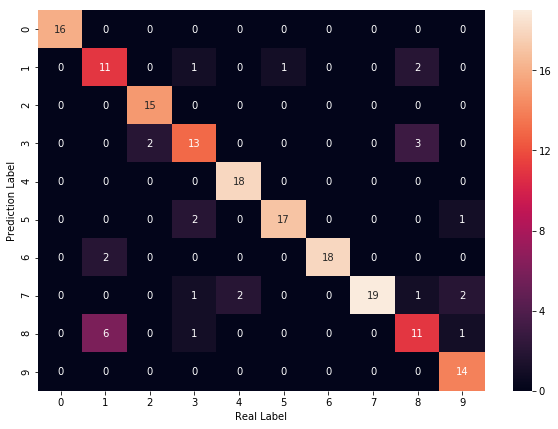

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:28 index:[1] real:5
#1 min_error:34 index:[3 7] real:2
#2 min_error:25 index:[1] real:8
#3 min_error:3 index:[0] real:0
#4 min_error:18 index:[1] real:1
#5 min_error:21 index:[7] real:7
#6 min_error:19 index:[6] real:6
#7 min_error:15 index:[3] real:3
#8 min_error:16 index:[2] real:2
#9 min_error:20 index:[1] real:1
#10 min_error:28 index:[7] real:7
#11 min_error:30 index:[7] real:4
#12 min_error:20 index:[6] real:6
#13 min_error:24 index:[3] real:3
#14 min_error:16 index:[1] real:1
#15 min_error:28 index:[3] real:3
#16 min_error:20 index:[7] real:9
#17 min_error:16 index:[1] real:1
#18 min_error:28 index:[7] real:7
#19 min_error:10 index:[6] real:6
#20 min_error:29 index:[8] real:8
#21 min_error:13 index:[4] real:4
#22 min_error:14 index:[3] real:3
#23 min_error:19 index:[1] real:1
#24 min_error:16 index:[4] real:4
#25 min_error:13 index:[0] real:0
#26 min_error:19 index:[5] real:5
#27 min_error:12 index:[3] real:3
#28 min_error:26 index:[6] real:6
#29 min_error:19 index:

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9022881880024737
Avg Base Learner:0.8085405071119355


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.10555555555555556
Accuracy on training set: 0.1388888888888889
Accuracy on training set: 0.18888888888888888
Accuracy on training set: 0.2833333333333333
Accuracy on training set: 0.26666666666666666
Accuracy on training set: 0.34444444444444444
Accuracy on training set: 0.4222222222222222
Accuracy on training set: 0.45
Accuracy on training set: 0.46111111111111114
Accuracy on training set: 0.4777777777777778
Accuracy on training set: 0.5111111111111111
Accuracy on training set: 0.5166666666666667
Accuracy on training set: 0.5388888888888889
Accuracy on training set: 0.5277777777777778
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.5944444444444444
Accuracy on training set: 0.5611111111111111
Accuracy on training set: 0.5833333333333334
Accuracy on training set: 0.6166666666666667
Accuracy on training set: 0.6333333333333333
Accuracy on training set: 0.6277777777777778
Accuracy on training set: 0.6222222222222222
Accuracy on trainin

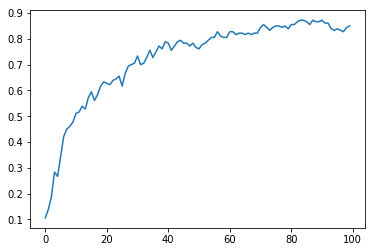

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
list_acc

[0.10555555555555556,
 0.1388888888888889,
 0.18888888888888888,
 0.2833333333333333,
 0.26666666666666666,
 0.34444444444444444,
 0.4222222222222222,
 0.45,
 0.46111111111111114,
 0.4777777777777778,
 0.5111111111111111,
 0.5166666666666667,
 0.5388888888888889,
 0.5277777777777778,
 0.5722222222222222,
 0.5944444444444444,
 0.5611111111111111,
 0.5833333333333334,
 0.6166666666666667,
 0.6333333333333333,
 0.6277777777777778,
 0.6222222222222222,
 0.6388888888888888,
 0.6444444444444445,
 0.6555555555555556,
 0.6166666666666667,
 0.6666666666666666,
 0.6944444444444444,
 0.7,
 0.7055555555555556,
 0.7333333333333333,
 0.7,
 0.7055555555555556,
 0.7277777777777777,
 0.7555555555555555,
 0.7277777777777777,
 0.75,
 0.7722222222222223,
 0.7611111111111111,
 0.7888888888888889,
 0.7833333333333333,
 0.7555555555555555,
 0.7722222222222223,
 0.7888888888888889,
 0.7944444444444444,
 0.7833333333333333,
 0.7833333333333333,
 0.7722222222222223,
 0.7833333333333333,
 0.7666666666666667,
 0.